**Breast Cancer Detection using Logistic Regression and KNN**

In [1]:
# import libraries
import numpy as np
import sklearn.datasets

In [2]:
# getting the dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer)
# class labels (0 - Malignant, 1 - Benign)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [9]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df['class'] = breast_cancer.target

In [11]:
df.head(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
print(df['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [14]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [15]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Class Labels**

0 - *Malignant*

1 - *Benign*

Train and Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [18]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (426,) (143,)


In [19]:
# test size - to specify the percentage of test data needed
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (455,) (114,)


In [21]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.6395604395604395 0.5789473684210527


In [22]:
# startify - split the equal distribution(balance number) of examples for each class label
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.6263736263736264 0.631578947368421


In [23]:
# random_state - specific split of data. Each value of random_state splits the data differently
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=1)
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.6263736263736264 0.631578947368421


In [24]:
print(X_train.mean(),X_test.mean(),X.mean())

61.04079777197802 65.28291521874269 61.890712339519624


In [25]:
print(X_train)

[[1.422e+01 2.312e+01 9.437e+01 ... 1.772e-01 5.166e-01 1.446e-01]
 [1.846e+01 1.852e+01 1.211e+02 ... 1.642e-01 3.695e-01 8.579e-02]
 [1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 ...
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.218e+01 1.408e+01 7.725e+01 ... 1.852e-02 2.293e-01 6.037e-02]
 [1.919e+01 1.594e+01 1.263e+02 ... 1.777e-01 2.443e-01 6.251e-02]]


Logistic Regression

In [26]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression() # loading the logistic regression model to the variable "classifier"

In [28]:
# training the model on training data
classifier.fit(X_train,Y_train)

C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluation of the model**

In [29]:
# import accuracy_score
from sklearn.metrics import accuracy_score

In [30]:
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [31]:
print("Accuracy on Training Data = ",accuracy_on_training_data)

Accuracy on Training Data =  0.9516483516483516


In [32]:
# predict on test_data
prediction_on_test_data = classifier.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [33]:
print("Accuracy on Test Data = ",accuracy_on_test_data)

Accuracy on Test Data =  0.9736842105263158


**Detecting whether the Patient has breast cancer in Bening or Malignant stage using Logistic Regression**

In [34]:
# Actual output for the input data is 0(Malignant)
input_data = (13.73,22.61,93.6,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431)

# change the input_data to numpy_array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

# reshape the array as we are predicting the output for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction) # returns a list with element [0] if Malignant; returns a list with element [1] if benign.

if (prediction == [0]):
  print("The Breast Cancer is Malignant")
else:
  print("The Breast Cancer is Malignant")

(13.73, 22.61, 93.6, 578.3, 0.1131, 0.2293, 0.2128, 0.08025, 0.2069, 0.07682, 0.2121, 1.169, 2.061, 19.21, 0.006429, 0.05936, 0.05501, 0.01628, 0.01961, 0.008093, 15.03, 32.01, 108.8, 697.7, 0.1651, 0.7725, 0.6943, 0.2208, 0.3596, 0.1431)
[0]
The Breast Cancer is Malignant


In [35]:
# Actual output for the input data is 1(Benign)
input_data = (9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)

# change the input_data to numpy_array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

# reshape the array as we are predicting the output for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction) # returns a list with element [0] if Malignant; returns a list with element [1] if benign.

if (prediction == [0]):
  print("The Breast Cancer is Malignant")
else:
  print("The Breast Cancer is Benign")

(9.504, 12.44, 60.34, 273.9, 0.1024, 0.06492, 0.02956, 0.02076, 0.1815, 0.06905, 0.2773, 0.9768, 1.909, 15.7, 0.009606, 0.01432, 0.01985, 0.01421, 0.02027, 0.002968, 10.23, 15.66, 65.13, 314.9, 0.1324, 0.1148, 0.08867, 0.06227, 0.245, 0.07773)
[1]
The Breast Cancer is Benign


**KNN - K Nearest Neighbor**

In [36]:
# model : KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2) #increase in k value increases the accuracy
# fit : training model
knn.fit(X_train,Y_train)
prediction_on_train_data = knn.predict(X_train)
#import metrics for accuracy calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train,prediction_on_train_data)
print("Acuuracy : ",accuracy)

Acuuracy :  0.9714285714285714


In [37]:
knn = KNeighborsClassifier(n_neighbors=4) #increase in k value increases the accuracy
# fit : training model
knn.fit(X_train,Y_train)
prediction_on_train_data = knn.predict(X_train)
#import metrics for accuracy calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train,prediction_on_train_data)
print("Acuuracy : ",accuracy)

Acuuracy :  0.9472527472527472


In [38]:
knn = KNeighborsClassifier(n_neighbors=2) #increase in k value increases the accuracy
# fit : training model
knn.fit(X_train,Y_train)
prediction_on_test_data = knn.predict(X_test)
#import metrics for accuracy calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction_on_test_data)
print("Acuuracy : ",accuracy)

Acuuracy :  0.9298245614035088


In [39]:
knn = KNeighborsClassifier(n_neighbors=4) #increase in k value increases the accuracy
# fit : training model
knn.fit(X_train,Y_train)
prediction_on_test_data = knn.predict(X_test)
#import metrics for accuracy calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction_on_test_data)
print("Acuuracy : ",accuracy)

Acuuracy :  0.956140350877193


**Detecting whether the Patient has breast cancer in Bening or Malignant stage using KNN**

In [40]:
# Actual output for the input data is 0(Malignant)
input_data = (19.81,22.15,130,1260,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398,0.1512,0.315,0.5372,0.2388,0.2768,0.07615)

# change the input_data to numpy_array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

# reshape the array as we are predicting the output for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction
prediction = knn.predict(input_data_reshaped)
print(prediction) # returns a list with element [0] if Malignant; returns a list with element [1] if benign.

if (prediction == [0]):
  print("The Breast Cancer is Malignant")
else:
  print("The Breast Cancer is Malignant")

(19.81, 22.15, 130, 1260, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615)
[0]
The Breast Cancer is Malignant


In [41]:
# Actual output for the input data is 1(Benign)
input_data = (8.888,14.64,58.79,244,0.09783,0.1531,0.08606,0.02872,0.1902,0.0898,0.5262,0.8522,3.168,25.44,0.01721,0.09368,0.05671,0.01766,0.02541,0.02193,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084)

# change the input_data to numpy_array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
print(input_data)

# reshape the array as we are predicting the output for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction
prediction = knn.predict(input_data_reshaped)
print(prediction) # returns a list with element [0] if Malignant; returns a list with element [1] if benign.

if (prediction == [0]):
  print("The Breast Cancer is Malignant")
else:
  print("The Breast Cancer is Benign")

(8.888, 14.64, 58.79, 244, 0.09783, 0.1531, 0.08606, 0.02872, 0.1902, 0.0898, 0.5262, 0.8522, 3.168, 25.44, 0.01721, 0.09368, 0.05671, 0.01766, 0.02541, 0.02193, 9.733, 15.67, 62.56, 284.4, 0.1207, 0.2436, 0.1434, 0.04786, 0.2254, 0.1084)
[1]
The Breast Cancer is Benign


**Compare Logistic Regression and KNN Model**

In [42]:
# import library
import matplotlib.pyplot as plt
from sklearn import model_selection

In [43]:
# Load Logistic Regression and KNN model
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'))]

In [46]:
# Evaluating the models
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.944976 (0.030038)
KNN: 0.923140 (0.026272)


C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VAISHU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

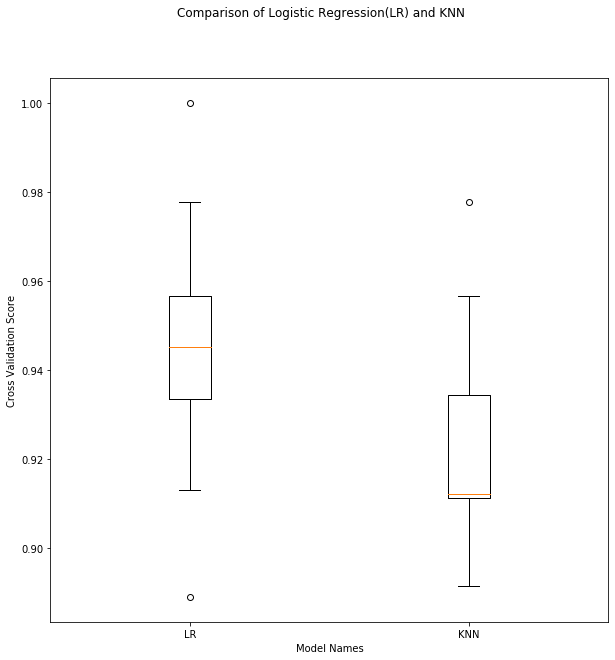

In [47]:
# Ploting BoxPlot
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of Logistic Regression(LR) and KNN')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Model Names')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
# Logistric Regression is better than KNN model